In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import numpy.ma as ma

In [22]:
filename='NDVI_new_2007_2015mon.nc'   # name of the file
with xr.open_dataset(filename) as ds1:      
    print(ds1)
ds1.NDVI

<xarray.Dataset>
Dimensions:  (time: 108, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 ... 2015-12-01
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    NDVI     (time, lat, lon) float32 ...


<xarray.DataArray 'NDVI' (time: 108, lat: 180, lon: 360)>
[6998400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 ... 2015-12-01
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    units:        
    fill_value:  -1e-30

In [26]:
print(ds1.time)

<xarray.DataArray 'time' (time: 108)>
array(['2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2008-05-01T00:00:00.000000000', '2008-06-01T00:00:00.000000000',
       '2008-07-01T00:00:00.000000000', '2008-08-01T00:00:00.000000000',
       '2008-09-01T00:00:00.000000000', '2008-10-01T00:00:00.000000000',
       '2008-11-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2009-

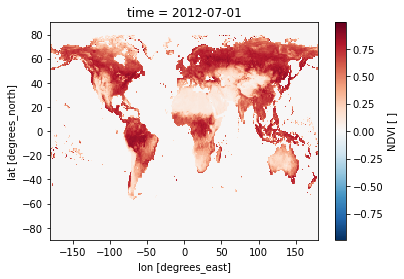

In [28]:
ds1.NDVI.sel(time='2012-07-01T00:00:00.000000000').plot()

In [21]:
# mask out negative values
ndvi=ds1.NDVI.where(ds1.NDVI > 0.)
ndvi

<xarray.DataArray 'NDVI' (time: 108, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 ... 2015-12-01
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    units:        
    fill_value:  -1e-30

In [17]:
# Calculate climatology of each month
ndvi_clim = ndvi.groupby('time.month').mean(dim='time')
ndvi_clim

<xarray.DataArray 'NDVI' (month: 12, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

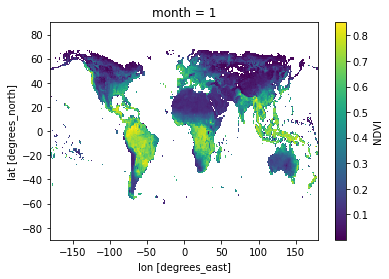

In [24]:
ndvi_clim.isel(month=0).plot()

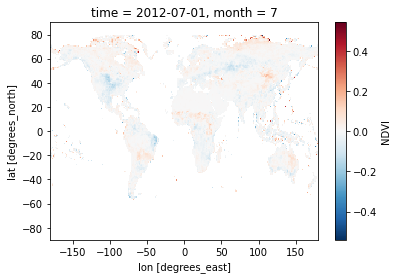

In [31]:
# Calculate and plot anomaly
anom=(ndvi.sel(time='2012-07-01T00:00:00.000000000')-ndvi_clim.sel(month=7))
anom.plot()

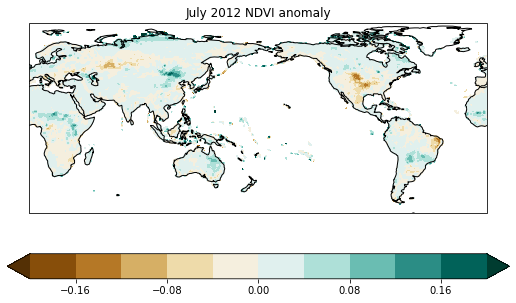

In [36]:
# Make a prettier plot

# contour level
lev1=np.arange(-0.2,0.21,0.04)

proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.BrBG

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=anom.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('July 2012 NDVI anomaly')
fig1.colorbar(cs, orientation='horizontal') # color map

Text(0.5, 1.0, 'July 2012 NDVI anomaly')

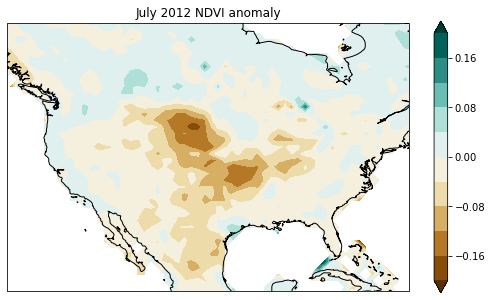

In [41]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([-130, -70, 20, 60], ccrs.PlateCarree())
cs2=anom.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('July 2012 NDVI anomaly')

We had a severe drought in the Midwest in 2012.

#### Exercises
Plot the global anomaly for July of 2010. 

Which region did we have droughts?